In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
#Leitura dos dados
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [21]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
data.dtypes

#Passengers    int64
dtype: object

Text(0.5, 0, 'Data - mensal')

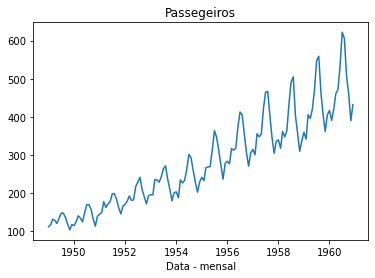

In [24]:
plt.plot(data)
plt.title('Passegeiros')
plt.xlabel('Data - mensal')

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

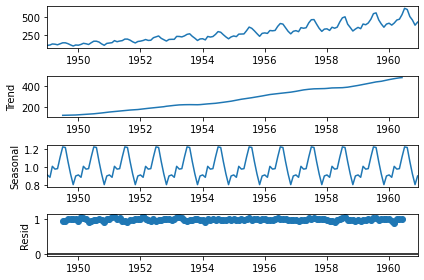

In [27]:
resultado = seasonal_decompose(data, model='multiplicative')
resultado.plot()
plt.show()

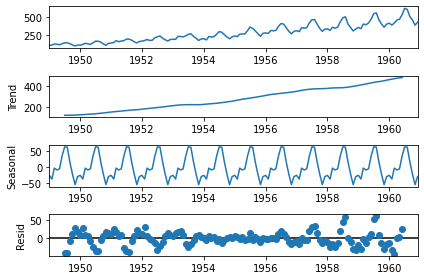

In [28]:
resultado = seasonal_decompose(data, model='aditive')
resultado.plot()
plt.show()

In [ ]:
# Estacionariedade

In [31]:
# Teste Dick-Fuller
from statsmodels.tsa.stattools import adfuller

In [29]:
y = data['#Passengers']

In [32]:
teste = adfuller(y)

In [ ]:
# p <= 0.05 - série temporal estacionária

In [33]:
teste

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [34]:
print('Valor-p %f' %teste[1])

Valor-p 0.991880


In [ ]:
# Tornar essa série estacionária

In [35]:
y_diff = np.diff(y)

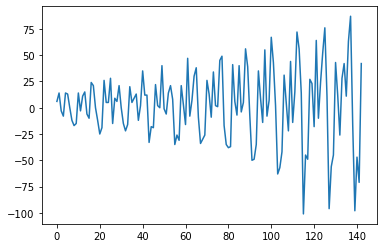

In [36]:
plt.plot(y_diff)

In [37]:
adfuller(y_diff)

(-2.829266824170006,
 0.05421329028382468,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [ ]:
# Segunda tentativa usando diferenciação

In [38]:
y_diff2 = np.diff(y_diff)

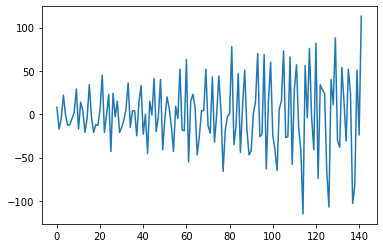

In [39]:
plt.plot(y_diff2)

In [40]:
adfuller(y_diff2)

(-16.384231542468527,
 2.732891850014085e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275605)

In [ ]:
# Previsões

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [43]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

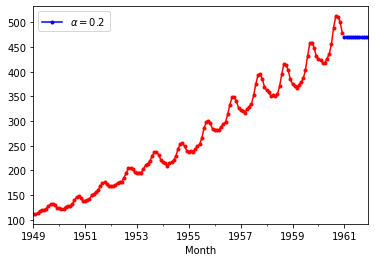

In [7]:
fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.',  color='red')

In [46]:
fit2 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized = False)
fcast2 = fit2.forecast(12).rename('Holts linear trend')

C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\marco\AppData\Local\Temp\ipykernel_1552\515080380.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit2 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized = False)


<AxesSubplot:xlabel='Month'>

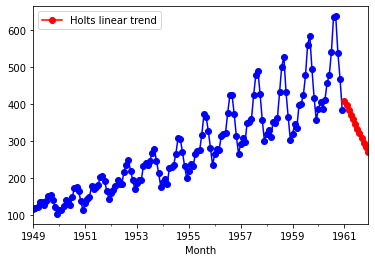

In [47]:
fit2.fittedvalues.plot(marker="o", color='blue')
fcast2.plot(color='red', marker="o", legend=True)

In [53]:
fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
fcast3 = fit2.forecast(12).rename("Additive damped trend")

C:\Users\marco\AppData\Local\Temp\ipykernel_1552\2828841311.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\marco\AppData\Local\Temp\ipykernel_1552\2828841311.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)


<AxesSubplot:xlabel='Month'>

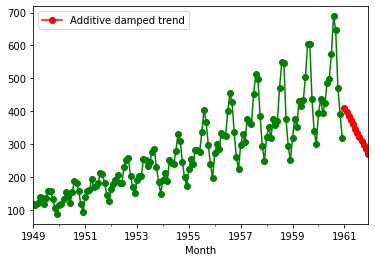

In [54]:
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='red', marker="o", legend=True)

<AxesSubplot:xlabel='Month'>

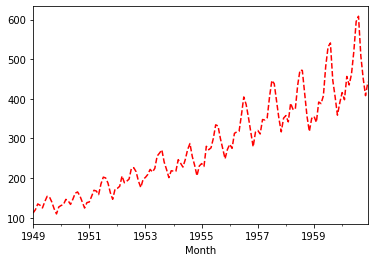

In [22]:
fit1.fittedvalues.plot(style='--', color='red')

<AxesSubplot:>

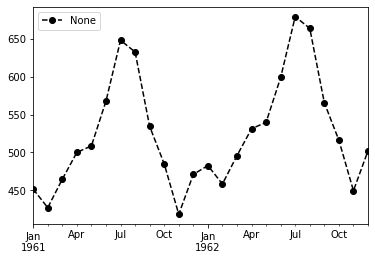

In [38]:
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

<AxesSubplot:xlabel='Month'>

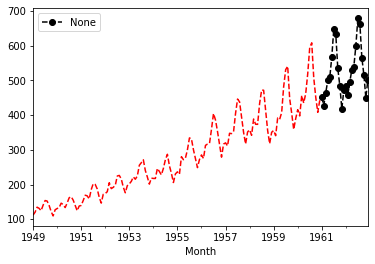

In [39]:
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<function matplotlib.pyplot.show(close=None, block=None)>

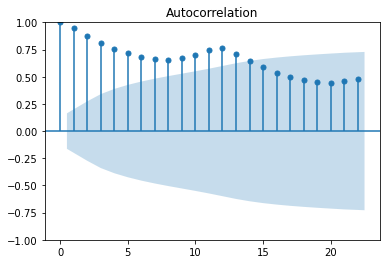

In [56]:
plot_acf(data)
plt.show

C:\Users\marco\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


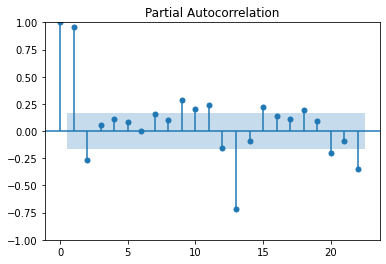

In [57]:
plot_pacf(data)
plt.show()

In [61]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
model = ARIMA(data, order=(8,2,10))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\marco\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                ARIMA(8, 2, 10)   Log Likelihood                -634.507
Date:                Fri, 17 Jun 2022   AIC                           1307.015
Time:                        16:57:30   BIC                           1363.175
Sample:                    01-01-1949   HQIC                          1329.836
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0899      0.306      0.293      0.769      -0.511       0.691
ar.L2         -0.1011      0.271     -0.374      0.709      -0.632       0.429
ar.L3          0.1425      0.188      0.759      0.4

C:\Users\marco\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


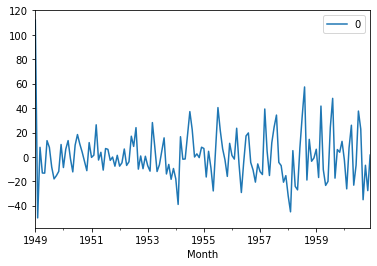

In [65]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

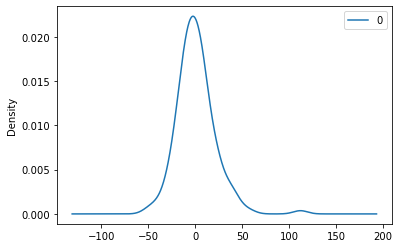

                0
count  144.000000
mean     0.866821
std     20.454443
min    -50.002920
25%    -11.364760
50%     -1.158776
75%      9.721502
max    112.000000


In [66]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [68]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [69]:
## pip install pmdarima
from pmdarima.arima import auto_arima

In [70]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.24 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.18 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.09 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [71]:
print(stepwise_model.aic())

1019.1780567487607


In [73]:
train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [74]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [75]:
future_forecast = stepwise_model.predict(n_periods=12)

In [76]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<AxesSubplot:xlabel='Month'>

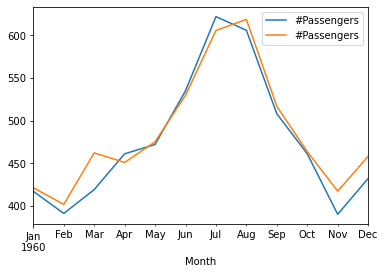

In [77]:
pd.concat([test,future_forecast],axis=1).plot()

<AxesSubplot:xlabel='Month'>

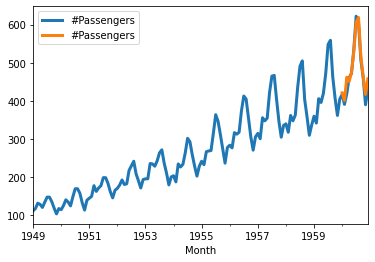

In [61]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)